In [1]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
m = gp.Model()

# Add variables
x = m.addVars(3, lb=-1, ub=10, name="x")
y = m.addVars(3, lb=-1, ub=10, name="y")
w = m.addVars(3, lb=0, ub=40, name="w")
c_x = m.addVar(lb=-1, ub=10, name="c_x")
c_y = m.addVar(lb=-1, ub=10, name="c_y")

# Set objective
m.setObjective(w[0] + w[1] + w[2], GRB.MINIMIZE)

# Add circle constraints
m.addConstr(x[0]*x[0] + y[0]*y[0] <= 1, "circle_1")
m.addConstr((x[1] - 3)*(x[1] - 3) + (y[1] - 2)*(y[1] - 2) <= 1, "circle_2")
m.addConstr((x[2])*(x[2]) + (y[2] - 5)*(y[2] - 5) <= 1, "circle_3")

# Add distance constraints
for i in range(3):
    m.addConstr((x[i] - c_x)*(x[i] - c_x) + (y[i] - c_y)*(y[i] - c_y) <= w[i]*w[i], f"distance_{i}")

# Optimize model
m.optimize()

# Print the optimal solutions
if m.status == GRB.OPTIMAL:
    for v in m.getVars():
        print(f"{v.varName}: {v.x}")
    print(f"Objective Value: {m.objVal}")
else:
    print("No solution found")


Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-04
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 0 rows, 11 columns and 0 nonzeros
Model fingerprint: 0xff4261fa
Model has 6 quadratic constraints
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [1e+00, 2e+00]
  QLMatrix range   [4e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 4e+01]
  RHS range        [0e+00, 0e+00]
  QRHS range       [1e+00, 2e+01]
Presolve time: 0.01s
Presolved: 26 rows, 22 columns, 43 nonzeros
Presolved model has 6 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 8.900e+01
 Factor NZ  : 1.660e+02
 Factor Ops : 1.298e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residua

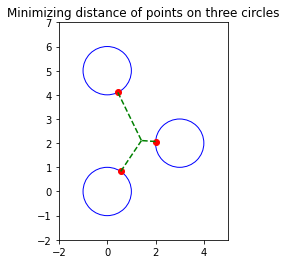

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting optimal solution values
c_x_val, c_y_val = c_x.x, c_y.x
x_vals = [x[i].x for i in range(3)]
y_vals = [y[i].x for i in range(3)]

# Plotting the circles
fig, ax = plt.subplots()
circles_centers = [(0,0), (3,2), (0,5)]
for i, center in enumerate(circles_centers):
    circle = plt.Circle(center, 1, color='blue', fill=False)
    ax.add_artist(circle)
    ax.plot(x_vals[i], y_vals[i], 'ro')  # plotting the points on the circle boundary

# Plotting the distances
for i in range(3):
    ax.plot([x_vals[i], c_x_val], [y_vals[i], c_y_val], 'g--')

# Adjusting the plot
ax.set_xlim(-2, 5)
ax.set_ylim(-2, 7)
ax.set_aspect('equal', 'box')
ax.set_title("Minimizing distance of points on three circles")
plt.show()
